# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [62]:
#Загрузим библиотеки
import pandas as pd
from IPython.display import HTML, display
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В наличии датафрейм с архивом объявлений о продаже квартир, состоящий из 22 признака,  которые можно разбить на три группы:
1. Признаки характеризующую саму квартиру  
2. Признаки  относящиеся к расположению квартиры
3. Признаки относящиеся к  объявлению. 

In [64]:
#Что бы не загромаждать работу лишними данными, удалим признаки  изучение влияния которых не стоит в целях проекта.
df.drop(['total_images','airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest'],axis='columns', inplace=True )


In [65]:
#Рассмотрим количественные признаки   
df.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18180.000000,20518.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,14191.277833,180.888634
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,8608.386210,219.727988
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,9238.000000,45.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,13098.500000,95.000000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,16293.000000,232.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,65968.000000,1580.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 16 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
dtypes: bool(2), float64(9), int64(2), object(3)
memory usage: 2.6+ MB


### Вывод

Датафрейм сотоит из 22 столбцов, из них имеют:
-  14  вещественный тип данных;
-  3  целочисленный тип данных;
-  3  строковый тип данных;
-  2  булев тип данных.

Пропуски содержаться в 14 столбцах. 

Для удобства и лучшей наглядности убрали признаки, влияние которых не изучается в целях проекта. 

###  Предобработка данных

In [67]:
#посчитаем дубликаты
print(df.duplicated().sum())

0


In [68]:
#Замена пропусков
#1.Высота потолков.
#Количество пропусков значительно (около 40% ).
#Удалять такой объем данных слишком расточительно. Нам нужно будет провести замену на среднее значение. 
#Высота потолка зависит от проекта дома. Есть типовые проекты - 'хрущевки','девятиэтажки',а также более современные проекты.
#У каждого проекта своя высота потолков. Вычислив в каких домах имеется пропуски, мы можем заменить их на среднее значение 

In [69]:
#2.Этажность дома 
#Для начала нам понадобится заменить пропуски в этажности дома. Пусть все дома с пропуском этого признака
#будут иметь значение '-1'
df['floors_total']=df['floors_total'].fillna(-1)

In [70]:
#Теперь обработаем пропуски в 'ceiling_height'
#Сначала заменим пропуски на -1, за тем на среднее значение для каждого типа дома
df['ceiling_height']=df['ceiling_height'].fillna(-1)
def fill_height (row):
    ceiling_height = row['ceiling_height']
    rooms = row['rooms']
    if ceiling_height == -1:      
        return height_to_median[rooms]
    return ceiling_height
  
height_to_median = df.groupby('rooms').mean()["ceiling_height"].to_dict() 
       
df["ceiling_height"]= df.apply(fill_height,axis=1)


In [71]:
#3.Пропуски в признаках Living_area и kitchen_area. По анлогии с высотой потолков можно подобрать среднее значение 
#для типовых квартир. 
#Посмотрим сколько в датафрейме 'однушек', 'двушек' и т.д. 
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [72]:
#Сведем признаки площади в отдельный датафрейм
df_area=df.pivot_table(index='rooms', values=('total_area','living_area','kitchen_area'), aggfunc=('count','mean'))
#Переиминуем для удобства столбцы
df_area.columns=(
                ['kitchen_count','kitchen_area_mean','living_count',
                 'living_area_mean', 'total_count','total_area_mean']
)
df_area

,kitchen_count,kitchen_area_mean,living_count,living_area_mean,total_count,total_area_mean
rooms,,,,,,
0,0,NaN,183,18.865246,197,29.279746
1,7213,9.550118,7388,17.893552,8047,37.644669
2,7286,9.979584,7296,31.736849,7940,55.855089
3,5380,11.308580,5366,47.387941,5814,77.764580
4,1081,13.664033,1089,66.983223,1180,107.610763
5,285,18.367649,292,100.009247,326,161.474816
6,97,21.048763,99,130.983636,105,201.537619
7,52,21.998077,53,163.564151,59,265.325424
8,9,24.866667,12,168.683333,12,259.233333


In [73]:
#Отдельно обработаем пропуски в квартирах с нулевым кол-вом комнат.
#всего таких пропусков 197. Посмотрим не случайны ли они?Проверим совпадают признаки 'open_plan','studio'
#с квартирами где кол-во комнат ранво нулю. 
rooms_zero=df.query('rooms==0 and (open_plan==True or studio==True)')
rooms_zero.shape


(197, 16)

In [74]:
#Да полностью совпали. 
#В таких квартирах нет отдельной кухни и комнат, а значит есть только общая площадь. 
#Да же в тех случаях, где владельцы указали 
#Заменим пропуски нулями. 
def living_zero_rooms(row):
    living_area = row['living_area']
    rooms = row['rooms']
    if rooms == 0:      
        return 0
    return living_area
df["living_area"]= df.apply(living_zero_rooms,axis=1)

def kitchen_zero_rooms(row):
    kitchen_area = row['kitchen_area']
    rooms = row['rooms']
    if rooms == 0:      
        return 0
    return kitchen_area
df["kitchen_area"]= df.apply(kitchen_zero_rooms,axis=1)

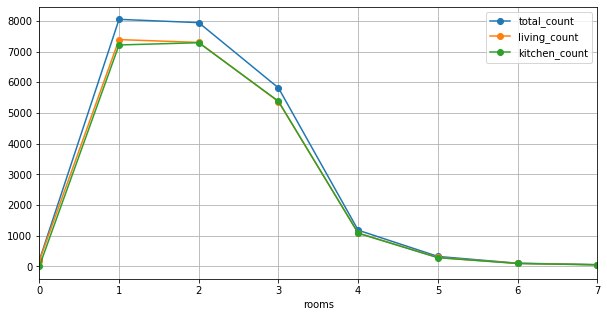

In [75]:
#Изучим оставщиеся пропуски в данных признаках.Посмотрим нет ли зависимости от количества комнат.
#Построим график , где по оси X разместим кол-во комнат, а,по оси Y кол-во данных в датафрейме по пропускам. 
df_area.plot(style='o-',y=['total_count', 'living_count','kitchen_count'],xlim=(0, 7), grid=True, figsize=(10, 5))

In [76]:
#На графике видно, что линии повторяют друг друга, это говорит о том что пропуски в данных не зависят от кол-ва комнат. 
#Поэтому мы можем заменить данные средними значениями для каждого вида квартиры.
#Заменим на -1 пропущенные знаяения для жилой площади
df['living_area']=df['living_area'].fillna(-1)
def fill_area(row):
    area = row['living_area']
    rooms = row['rooms']
    if area == -1:      
        return area_to_median[rooms]
    return area
  
area_to_median = df.groupby('rooms').mean()["living_area"].to_dict() 
       
df["living_area"]= df.apply(fill_area,axis=1)


In [77]:
#То же самое проделаем для площади кухни

df['kitchen_area']=df['kitchen_area'].fillna(-1)
def fill_area(row):
    area = row['kitchen_area']
    rooms = row['rooms']
    if area == -1:      
        return area_to_median[rooms]
    return area
  
area_to_median = df.groupby('rooms').mean()["kitchen_area"].to_dict() 
       
df["kitchen_area"]= df.apply(fill_area,axis=1)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 16 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
dtypes: bool(2), float64(9), int64(2), object(3)
memory usage: 2.6+ MB


In [79]:
#Посмотрим пропуски в признаке апартамент. 
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [80]:
#количество пропусков около 90%. Количество  апартаментов, указанных в датафрейме - 47 (или около 0,2%). 
#Качество данных недостаточно для изучения влияния признака 'апартаменты' на продажи.
#Данный столбец удалим
df.drop(['is_apartment'],axis='columns', inplace=True )

In [81]:
#Посмотрим пропуски в признаке наличие балкона. 
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [82]:
#В данном признаке логично предположить, что раз человек не указал кол-во балконов , то их скорее всего нет. 
#Заменим пропуски на ноль.
df['balcony']=df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 15 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
dtypes: bool(2), float64(9), int64(2), object(2)
memory usage: 2.4+ MB


In [83]:
#Пропуски по признаку 'locality_name'. Данный признак категорийный, обозначим пропуски Undf
df['locality_name']=df['locality_name'].fillna('Undf')

In [84]:
#Глянем на значения  в столбце 'locality_name'
df['locality_name'].unique()
#в названиях встречаются слова поселок, деревня и т.д. Есть названия без обозначения нас.пункта.
#Возможны дубликаты - когда нас.пункт имеет два и более названий.
#Есть особенность в данных - на первый взгяд имена собственные начинаются с заглавной буквы.
#вытащим имена собсвтенные 'locality_name' и передадим в столбец 'filtered_name'
df['filtered_name']=df['locality_name'].str.extract('([A-zА-Я]+[-\sА-Яёа-яA-z0-9]+)')

In [85]:
df['filtered_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [86]:
#Проверим наш алгоритм. Если в стобце'filtered_name' нет пропусков - значит мы во всех названиях вытащили имена собственные.
#Изучем на пропуски  есть пропуски 'filtered_name'
df['filtered_name'].isnull().sum()
#Все поселки теперь имеюь название состоящие только из собственного имени! 

0

In [87]:
#Обработаем пропуски в признаке 'cityCenters_nearest'
#Переводим метры в км, округляем и меняем пропуски на -1
df['cityCenters_nearest']=df['cityCenters_nearest']/1000
df['cityCenters_nearest']=df['cityCenters_nearest'].apply(np.round)
df['cityCenters_nearest']=df['cityCenters_nearest'].fillna(-1)

In [88]:
#В датафрейме остались пропуски в 'days_exposition'.Скорее всего эти данные незаполнены из-за того что объекты не проданы.
#Обозначим пропуски  -1
df['days_exposition']=df['days_exposition'].fillna(-1)

In [89]:
#Заменим тип данных float на int, в тех признаказ где десятые доли не имеют значения:
#кол-во дней продажи,цена, кол-во этажей, кол-во балконов, расстояние от центра
#чуствительные к долям признаки: площади и высоту потолкво в квартире оставим float
df['days_exposition']=df['days_exposition'].astype(int)
df['last_price']=df['last_price'].astype(int)
df['floors_total']=df['floors_total'].astype(int)
df['balcony']=df['balcony'].astype(int)
df['cityCenters_nearest']=df['cityCenters_nearest'].astype(int)

In [90]:
#Тип данных признака first_day_exposition преобразуем  в дату 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 16 columns):
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
cityCenters_nearest     23699 non-null int64
days_exposition         23699 non-null int64
filtered_name           23699 non-null object
dtypes: bool(2), datetime64[ns](1), float64(4), int64(7), object(2)
memory usage: 2.6+ MB


В предобработке данных не обнаружены полные дубликаты. Обработан категориальный признак 'locality_name' на дубликаты.

Пропуски в признаках  'ceiling_height','total_count', 'living_count','kitchen_count' заменены на медианное и средние значения
в зависимости от типа квартиры и дома. 

Признак 'cityCenters_nearest' переведен на км и округлен до целого значения. Пропуски обозначены -1

Преобразованы данные признаков'days_exposition','last_price','floors_total','balcony','cityCenters_nearest' из float d int
Оставышиеся признаки c типом float - имеют критическое значение, это  высота потолка и площади

Тип данных признак 'first_day_exposition' переведен во временной тип

###  Посчитайте и добавьте в таблицу

In [92]:
#Добавим в столбец цену квадратного метра 
df['price_m2']=df['last_price']/df['total_area']


In [93]:
#Добавим день, месяц и год размещения объявения 
df['weekday']=df['first_day_exposition'].dt.weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [94]:
#Добавим столбец с тремя категориями этажей: первый, последний , другой
def fill_floor(row):
        """
        Возвращает категорию  этажа квартиры 
        если текущий этаж равен этажности здания , то возвращает "последний"
        если текущий этаж равен 1 , то возвращает "первый"
        в остальных случаях возвращает "другой"
        """
        floors_total = row['floors_total']
        floor = row['floor']
        if floor == 1 :return "первый" 
        if floor == floors_total and floors_total!=1  :return "последний"
        return 'другой'

      
df['floor_group']= df.apply(fill_floor,axis=1)

In [95]:
#Добавим соотношение площадей
df['living_to_total']=df['living_area']/df['total_area']
df['kitchen_to_total']=df['kitchen_area']/df['total_area']

In [96]:
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,cityCenters_nearest,days_exposition,filtered_name,price_m2,weekday,month,year,floor_group,living_to_total,kitchen_to_total
0,13000000,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,False,...,16,-1,Санкт-Петербург,120370.370370,3,3,2019,другой,0.472222,0.231481
1,3350000,40.4,2018-12-04,1,1.130377,11,18.600000,1,False,False,...,19,81,Шушары,82920.792079,1,12,2018,первый,0.460396,0.272277
2,5196000,56.0,2015-08-20,2,1.294587,5,34.300000,4,False,False,...,14,558,Санкт-Петербург,92785.714286,3,8,2015,другой,0.612500,0.148214
3,64900000,159.0,2015-07-24,3,1.459819,14,43.659389,9,False,False,...,7,424,Санкт-Петербург,408176.100629,4,7,2015,другой,0.274587,0.065345
4,10000000,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,False,...,8,121,Санкт-Петербург,100000.000000,1,6,2018,другой,0.320000,0.410000


###  Проведите исследовательский анализ данных и выполните инструкции:

### Анализ признаков: площадь, цена,число комнат, высота потолков

In [97]:
#Для наглядности выдели признаки в отдельный датафрейм. 
df_area=df.loc[:,['total_area','living_area','kitchen_area','rooms','ceiling_height']]
#Добавим столбец с ценой переведенной в млн.(так же для удобства чтения) 
df_area['last_price_mln']=df['last_price']/1000000
#почистим столбцы от значений пропусков.
df_area.describe()

,total_area,living_area,kitchen_area,rooms,ceiling_height,last_price_mln
count,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.348651,34.056275,10.387108,2.070636,2.195952,6.541549
std,35.654083,21.874952,5.723849,1.078405,1.228446,10.887013
min,12.000000,0.000000,0.000000,0.000000,-1.000000,0.012190
25%,40.000000,18.300000,7.200000,1.000000,1.294587,3.400000
50%,52.000000,30.000000,9.075220,2.000000,2.500000,4.650000
75%,69.900000,42.700000,11.600000,3.000000,2.700000,6.800000
max,900.000000,409.700000,112.000000,19.000000,100.000000,763.000000


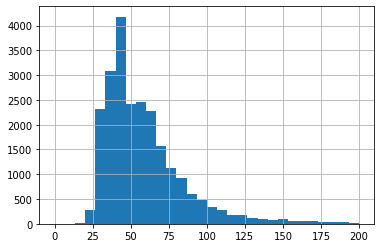

In [98]:
#Построим гистограммы распределения для указанных велечин.
df_area['total_area'].hist(bins=30, range=(0, 200))

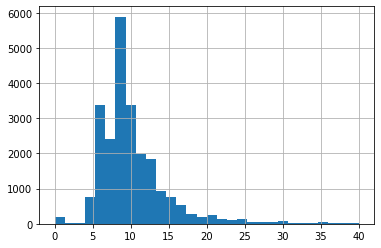

In [99]:
df['kitchen_area'].hist(bins=30, range=(0, 40))

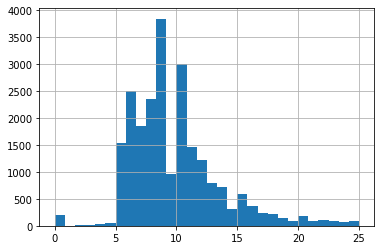

In [100]:
df_area['kitchen_area'].hist(bins=30, range=(0, 25))

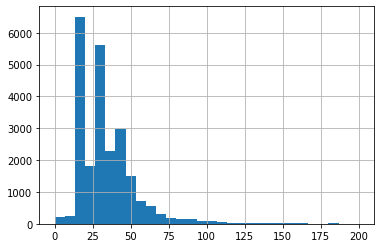

In [101]:
df_area['living_area'].hist(bins=30, range=(0, 200))

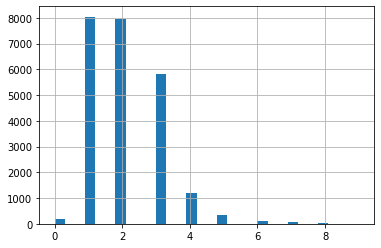

In [102]:
df_area['rooms'].hist(bins=30, range=(0, 9))

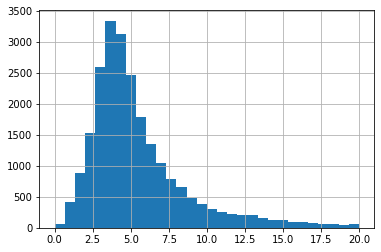

In [103]:
df_area['last_price_mln'].hist(bins=30, range=(0, 20))

Средняя жилая площадь составляет 34 кв.м. Есть три характерных пика. 
Они соответсвуют квартирам с 1,2,3 комнатами соответсвенно. 

Средняя общая площадь 60 кв.м 

Средняя площадь кухни 5,7 кв.м Так же есть пики в районе 5,5 кв.м  и в районе 7 кв.м. Это говорит о большом наличии "хрущевок"

Однушки - самый популярный сегмент рынка, немногим отстают двушки, далее трешки.
Далее резко снижается популярность больших квартир

Средняя цена квартиры 6.54 млн. руб. При этом более половины квартир дешевле 4.65.  

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
понятно
<br>
</font>

###  Время продажи квартиры


In [104]:
#Изучим время продажи квартиры. Избавимся от квартир, которые не проданы. 
days_exposition=df.query('days_exposition!=-1')
#Посмотри на числовые характеристики
print('Длительность продажи в среднем составляет:{:.1f} дней'.format(days_exposition['days_exposition'].mean()))
print('Медианное значение составляет:{:.1f} дней'.format(days_exposition['days_exposition'].median()))

Длительность продажи в среднем составляет:180.9 дней
Медианное значение составляет:95.0 дней


In [105]:
days_exposition['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

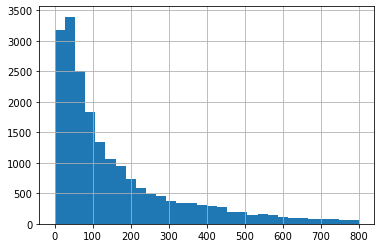

In [106]:
days_exposition['days_exposition'].hist(bins=30, range=(0, 800))

Продажа в среднем длится 180 дней. При этом половина квартир продаются быстрее чем за 95 дней. 
Есть квартиры которые продаются одним днем, а есть те кто ждет более 4 лет.
Проданными быстро можно считать квартиры, простоявшие в ожидании менее 45 дней. 
Долгопродающиеся квартиры ожидают своего покупателя в течении 232 дней и более. 

###  Редкие и выдающиеся значения


(0, 150)

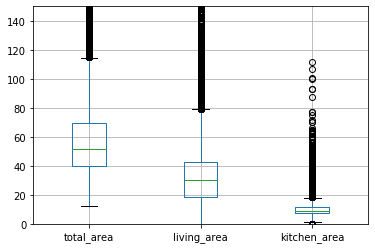

In [107]:
#Постороим диаграммы рассеивания для количественных признаков площади
df.boxplot(column=['total_area', 'living_area','kitchen_area'])
plt.ylim(0,150)

(0, 10)

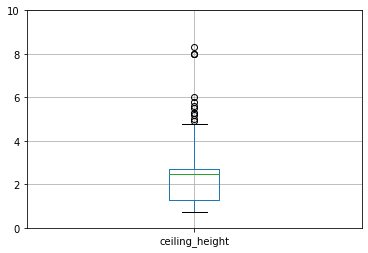

In [108]:
#Для высоты потолков 
df_area.boxplot(column=['ceiling_height'])
plt.ylim(0,10)

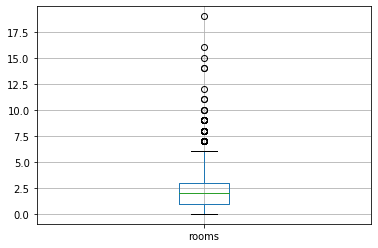

In [109]:
#кол-ва комнат
df_area.boxplot(column=['rooms'])

(0, 15)

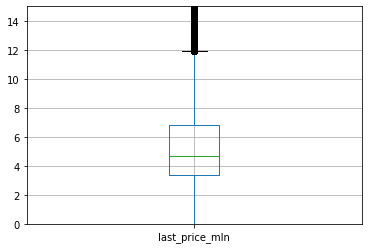

In [110]:
#цены 
df_area.boxplot(column=['last_price_mln'])
plt.ylim(0,15)

In [111]:
#В датафрейме встречаются редкие и выдающиеся значения. 
#Cуществуют ошибки ввода, так например часто встречается высота потолка 27 метров (скорее всего высота 2,7 метра)
#Но сущестуюют уникальные при этом реальные выдающиеся квартиры по своим параметрам.
#Мы находили квартиры ценой в 763 млн рублей. Площадью 900 кв.м и т.д. 
#Такие объекты редки и продажа их это отдельная история, мало связанная с общими трендами рынка.
#Тем неменее в целях проекта стоит задача изучить центр Санкт-Петербурга, а это скопление
#уникальных квартир
#Для изучения массового сегмента создадим датафрейм df_mass.

df_mass = df 


In [112]:
new_list = ['total_area', 'rooms', 'last_price', 'ceiling_height']

for column in new_list:
    Q1 = df_mass[column].quantile(0.25)
    Q3 = df_mass[column].quantile(0.75)
    IQR = Q3 - Q1
    tmp = df_mass[column]
    df_mass = df_mass.query('(@Q1 - 1.5 * @IQR) <= @tmp <= (@Q3 + 1.5 * @IQR)')


In [113]:
df_mass.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_m2,weekday,month,year,living_to_total,kitchen_to_total
count,2.108700e+04,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000,21087.000000
mean,4.699561e+06,52.105543,1.899891,2.117191,10.728126,29.582454,5.885569,9.365405,0.587661,10.960639,150.293878,91340.195066,2.576706,6.394983,2017.389102,0.556478,0.189821
std,2.037188e+06,17.295414,0.885230,0.720847,6.658242,12.802185,4.908626,3.608349,0.930928,10.170265,203.344196,29059.507537,1.794789,3.489753,1.017545,0.119772,0.073020
min,1.219000e+04,12.000000,0.000000,0.708376,-1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,111.834862,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,3.300000e+06,38.800000,1.000000,1.294587,5.000000,18.000000,2.000000,7.000000,0.000000,-1.000000,24.000000,74324.324324,1.000000,3.000000,2017.000000,0.485503,0.136957
50%,4.350000e+06,48.400000,2.000000,2.500000,9.000000,29.000000,4.000000,9.000000,0.000000,12.000000,70.000000,92187.500000,3.000000,6.000000,2017.000000,0.562500,0.177419
75%,5.850000e+06,62.300000,3.000000,2.650000,16.000000,38.700000,8.000000,10.800000,1.000000,16.000000,191.000000,108398.473282,4.000000,10.000000,2018.000000,0.634866,0.234908
max,1.070000e+07,114.500000,6.000000,4.500000,60.000000,93.600000,33.000000,50.000000,5.000000,66.000000,1580.000000,312240.000000,6.000000,12.000000,2019.000000,1.470011,0.787879


В результате "чистки" от выдающихся значений, мы сократили объем данных примерно на 11%. 
Не так много, но оставшиеся данные  помогут сделать более точные выводы. 

### Анализ факторов влияющих на цену


In [114]:
#Просмотрим как различные признаки влияют на цену.Для этого возьмем df_mass 
corr=['price_m2', 'rooms','cityCenters_nearest','weekday','month','year']
for corr in corr:
    print('Коэф. корр-ции  цены с', corr,'равен: {:.3f}'.format(df_mass[corr].corr(df['last_price'])))


Коэф. корр-ции  цены с price_m2 равен: 0.617
Коэф. корр-ции  цены с rooms равен: 0.428
Коэф. корр-ции  цены с cityCenters_nearest равен: 0.150
Коэф. корр-ции  цены с weekday равен: -0.013
Коэф. корр-ции  цены с month равен: 0.001
Коэф. корр-ции  цены с year равен: 0.009


In [115]:
#посмотрим как меняется цена квадратного метра в зависимости от этажа 
df_mass.groupby('floor_group')['price_m2'].mean()

floor_group
другой       95356.569956
первый       78300.790845
последний    82393.084923
Name: price_m2, dtype: float64

In [116]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. 
df['filtered_name'].value_counts().head(10)

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: filtered_name, dtype: int64

In [117]:
#Отфильтруем датафрейм по списку top10
top10=['Санкт-Петербург','Мурино','Кудрово','Шушары','Всеволожск','Пушкин','Колпино','Парголово','Гатчина','Выборг']
df_top10=df.query('filtered_name == @top10')
#Посчтитаем среднее и отсортируем по возрастанию. 
df_top10.groupby('filtered_name')['price_m2'].mean().sort_values()

filtered_name
Выборг              58141.909153
Всеволожск          68654.473986
Гатчина             68746.146763
Колпино             75424.579098
Шушары              78677.364217
Мурино              86087.512050
Парголово           90175.913458
Кудрово             95324.930544
Пушкин             103125.819291
Санкт-Петербург    114849.008794
Name: price_m2, dtype: float64

Наиболее влиятельный признак - это цена квадратного метра. День, месяц и год размещения объявления 
не оказывают влияния. 

Есть разница в цене квадратного метра в зависимости от этажа. Менее всего ценят первый  и последний 
этажи. 

В топ 10 самых крупных по количеству продаж самая высокая среднаяя цена за кв.м у Санкт-Петербурга - 114 т.р ,
самая низкая в Выборге - 58 т.р. 

### Анализ квартир в Санкт-Петербуге


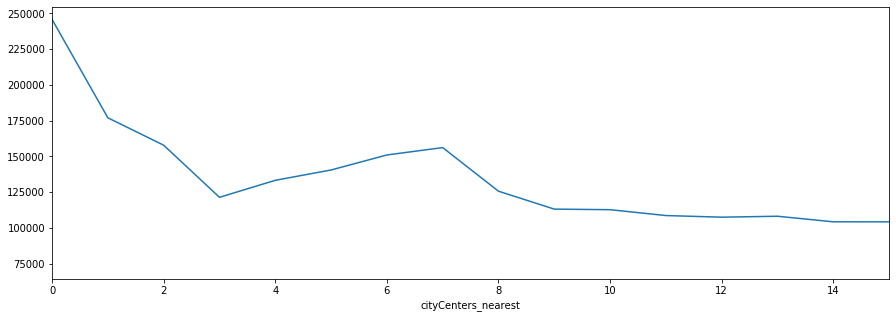

In [118]:
#Определим радиус центра г.Санкт-Петербурга по цене за м2
#Предположим что в центре цена высокая и снижается к его границе, за которой  изменение цены идет более гладко.
#отфильтруем дата фрейм по городу и уберем значения с пропусками растояния до центра. 
df_SPB=df.query('filtered_name=="Санкт-Петербург" and cityCenters_nearest!=-1')
price_mean_area=df_SPB.groupby('cityCenters_nearest')['price_m2'].mean()
price_mean_area.plot(figsize=(15, 5),xlim=(0, 15))

По графику видно, что средняя цена максимальна в 0 и резко снижается к 3 км, далее с небольшим колебанием плавно снижается. 
Отсюда делаем выво, что радиус центра - 3 км. 

###  Анализ квартир в центре Санкт-Петербурга


In [119]:
#Отфилтруем  квартиры по расстоянию до 3 км от центра
SPB_Centers=df.query('0<=cityCenters_nearest <= 3' )
SPB_Centers.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,cityCenters_nearest,days_exposition,price_m2,weekday,month,year,living_to_total,kitchen_to_total
count,8.830000e+02,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,8.830000e+02,883.000000,883.000000,883.000000,883.000000,883.000000
mean,1.628459e+07,98.602401,3.109853,2.711863,4.980747,60.025262,3.150623,14.580684,0.115515,2.118913,204.980747,1.501102e+05,2.596829,6.420159,2017.139298,0.598780,0.164608
std,2.640215e+07,56.454467,1.483983,1.197574,1.247525,38.346912,1.501687,8.996330,0.415430,0.852178,267.006711,1.248717e+05,1.726961,3.551232,1.154635,0.116936,0.088963
min,2.100000e+06,12.000000,0.000000,0.708376,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,2.891963e+04,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,7.300000e+06,63.300000,2.000000,1.661517,4.000000,35.750000,2.000000,9.075220,0.000000,2.000000,18.000000,9.655084e+04,1.000000,3.000000,2017.000000,0.534282,0.110023
50%,9.800000e+06,85.000000,3.000000,3.000000,5.000000,50.000000,3.000000,11.600000,0.000000,2.000000,94.000000,1.172840e+05,3.000000,7.000000,2017.000000,0.610909,0.140402
75%,1.499500e+07,116.500000,4.000000,3.300000,6.000000,71.950000,4.000000,17.800000,0.000000,3.000000,284.000000,1.517824e+05,4.000000,10.000000,2018.000000,0.679646,0.191601
max,4.013000e+08,517.000000,14.000000,27.000000,12.000000,332.000000,10.000000,87.200000,4.000000,3.000000,1572.000000,1.736842e+06,6.000000,12.000000,2019.000000,0.885852,0.704724


In [120]:
#Просмотрим как различные признаки влияют на цену.Для этого возьмем df_mass 
corr=['price_m2', 'rooms','cityCenters_nearest','days_exposition']
for corr in corr:
    print('Коэф. корр-ции  цены с', corr,'равен: {:.3f}'.format(SPB_Centers[corr].corr(df['last_price'])))


Коэф. корр-ции  цены с price_m2 равен: 0.828
Коэф. корр-ции  цены с rooms равен: 0.241
Коэф. корр-ции  цены с cityCenters_nearest равен: -0.181
Коэф. корр-ции  цены с days_exposition равен: 0.013


In [121]:
SPB_Centers.groupby('floor_group')['price_m2'].mean()

floor_group
другой       157887.268705
первый       125904.597931
последний    144743.431715
Name: price_m2, dtype: float64

Средняя цена в центре города 16 млн, что в 4 раза выше чем в целом по всем объявлениям.

Средняя цена квадратного метра  150 т.р., против 91 т.р

Средняя площадь 98 кв.м. против 52 кв. 

Кол-во комнат в среднем 3,1 против 1,89 

Средняя высота потолков почти не отлечается от средней по городу 

Наибольшее влияние на цену квартиры имеет цена квадратного метра. 

В целом центр, как и положену любому центру крупного города, имеет более просторное  и дорогое 
жилье. 


### Общий вывод

В результате работы проанализирован рынок жилья в Санкт-Петербурге и Ленинградской области. 

В целом регион состоит из типового жилья. Это однушки, двушки и трешки.

Средняя квартирка стоит 4,7 млн руб. 

Средняя площадь 52 кв.м.

Сильно выделяется  центр города. Самое просторное и дорогое жилье находится в радиусе 3 км от центра. 